任务：
使用线性回归 和决策树回归预测学生期末成绩，并比较模型性能。数据集采用UCI机器学习库中的"学生表现数据集"。  数据文件：student-mat.csv

实现步骤：
1. 将数据加载到Pandas DataFrame
2. 分离特征(X)和目标变量(y)
3. 按80-20划分训练测试集(random_state=42)
4. 使用StandardScaler标准化特征
5. 训练以下模型：
   - 线性回归
   - 决策树回归
6. 计算各模型的MSE分数
7. 输出评估指标


In [77]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

In [78]:
path = r'E:\kecheng\github_mine\ml_work\datas\student-mat.csv'
datas = pd.read_csv( path ,delimiter=';' , )

datas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [79]:
datas.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [80]:
np.all(datas['schoolsup'].isnull()) , np.all(datas['famsup'].isnull()) ,np.all(datas['paid'].isnull()),np.all(datas['activities'].isnull()),np.all(datas['nursery'].isnull()),np.all(datas['higher'].isnull()),np.all(datas['internet'].isnull()),np.all(datas['romantic'].isnull())

(False, False, False, False, False, False, False, False)

In [81]:
datas.drop(["G1","G2"] , axis = "columns", inplace = True)
datas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [82]:
datas.loc[:,['schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic']] = datas.loc[:,['schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic']].map(lambda X: 1 if X=='yes' else 0 ,)

In [95]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    int64 
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    int64 
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [84]:
datas['address'].value_counts()
datas['address'] = datas['address'].map(lambda x: 0 if x=='U' else 1)

In [85]:
datas['Pstatus'].value_counts()
datas['Pstatus'] = datas['Pstatus'].map(lambda x: 0 if x=='T' else 1)

array([[<Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>,
        <Axes: title={'center': 'goout'}>],
       [<Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G3'}>, <Axes: >]], dtype=object)

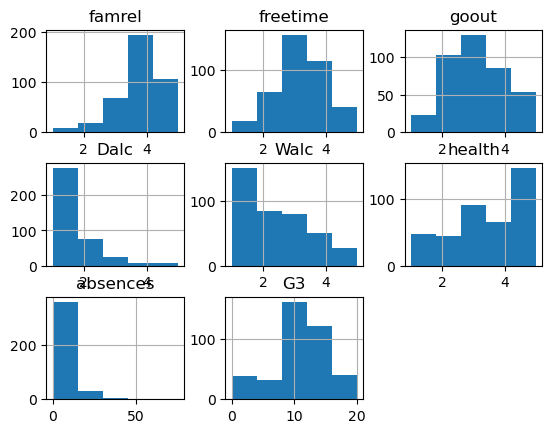

In [86]:
datas.loc[:,"famrel":'G3'].hist(bins=5)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel

In [97]:
trainset, testset = train_test_split(datas, test_size=0.2, random_state=42)
X_train = trainset.iloc[:,:-1]
y_train = trainset.iloc[:,-1]
X_test = testset.iloc[:,:-1]
y_test = testset.iloc[:,-1]

In [98]:
def log_(X):
    X +=1
    return np.log(X)
log_pipeline = make_pipeline(SimpleImputer(strategy='mean'),FunctionTransformer(log_ , ),StandardScaler())
str_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent') , OneHotEncoder(handle_unknown='ignore'))
default_number_pipeline = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())


In [105]:
pra_pipeline = ColumnTransformer([
    ("log", log_pipeline, ["famrel",'Dalc' ,"Walc","health",'absences']),
    ("str",str_pipeline , make_column_selector(dtype_include=object)),
], remainder=default_number_pipeline)
from sklearn.ensemble import RandomForestRegressor
full_pipeline1 = Pipeline([('processing',pra_pipeline) ,("reg" ,LinearRegression())])
full_pipeline2 = Pipeline([('processing',pra_pipeline ),("reg" ,DecisionTreeRegressor(random_state=42))])
# ,('sel_fea' , SelectFromModel(estimator= RandomForestRegressor(n_estimators=100 , random_state=42),threshold='median'))

In [106]:
full_pipeline1.fit(X_train,y_train)
full_pipeline2.fit(X_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_ at 0x0000020AFCB392D0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['famrel', 'Dalc', 'Walc',
                                                   'health', 'absences']),
                                                 ('str',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020AFE101E70>)])),
                ('reg', DecisionTreeRegressor(random_state=42))])

In [107]:
y_pred1 = full_pipeline1.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,full_pipeline1.predict(X_test),)

18.099990072129646

In [108]:
y_pred2 = full_pipeline2.predict(X_test)
mean_squared_error(y_test,y_pred2,)


22.341772151898734